## word2vec model

In [1]:
#Vector values
%store -r X1
#Tokens
%store -r X2 

#### Hierarchical Clustering (Agglomerative)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%store -r X0

In [4]:
df = pd.DataFrame(X0)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.182876,-0.539255,0.623149,0.008464,0.431349,-0.381419,-0.096156,0.402546,-0.374244,0.215626,...,-0.239564,-0.137126,-0.624595,-0.416080,0.112537,-0.051800,-0.421833,-0.872877,0.250991,-0.363233
1,-0.898775,-0.525640,0.484910,0.079801,0.389435,-0.405577,-0.090909,0.304581,-0.240838,0.118364,...,-0.195233,-0.128892,-0.596956,-0.391619,0.058752,-0.033231,-0.332462,-0.740581,0.253588,-0.328854
2,-0.898998,-0.483292,0.491294,0.046856,0.377234,-0.384501,-0.088844,0.283815,-0.258444,0.155945,...,-0.200170,-0.112116,-0.539157,-0.359218,0.035425,-0.055829,-0.300265,-0.693450,0.215287,-0.306638
3,-0.922868,-0.558936,0.495553,0.115359,0.424003,-0.462849,-0.107120,0.332129,-0.226776,0.130044,...,-0.223359,-0.130825,-0.647510,-0.450930,0.074602,-0.034828,-0.349202,-0.789436,0.263617,-0.340973
4,-1.070419,-0.607455,0.565508,0.122724,0.462499,-0.466554,-0.095084,0.381031,-0.268322,0.114248,...,-0.254694,-0.179352,-0.726750,-0.486144,0.103926,-0.009376,-0.455256,-0.921676,0.319046,-0.397929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,-0.847113,-0.471628,0.462987,0.047407,0.373264,-0.366083,-0.096897,0.296906,-0.234989,0.143815,...,-0.189319,-0.111783,-0.535008,-0.356312,0.049205,-0.050779,-0.292119,-0.670910,0.214802,-0.314861
2339,-0.779544,-0.506875,0.426720,0.108979,0.386499,-0.420156,-0.087601,0.294217,-0.168192,0.076739,...,-0.200740,-0.131923,-0.587230,-0.393712,0.062481,-0.029494,-0.305283,-0.692354,0.251748,-0.322637
2340,-0.861640,-0.555067,0.473710,0.100930,0.423303,-0.470789,-0.102910,0.336168,-0.184507,0.089637,...,-0.217675,-0.135928,-0.644451,-0.422058,0.065832,-0.037323,-0.315606,-0.749253,0.269930,-0.361516
2341,-0.743727,-0.493287,0.411707,0.101703,0.375816,-0.415421,-0.090648,0.296040,-0.151840,0.074667,...,-0.191211,-0.119361,-0.562058,-0.385415,0.061182,-0.033107,-0.270259,-0.645806,0.242805,-0.315184


In [ ]:
#Number of Clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

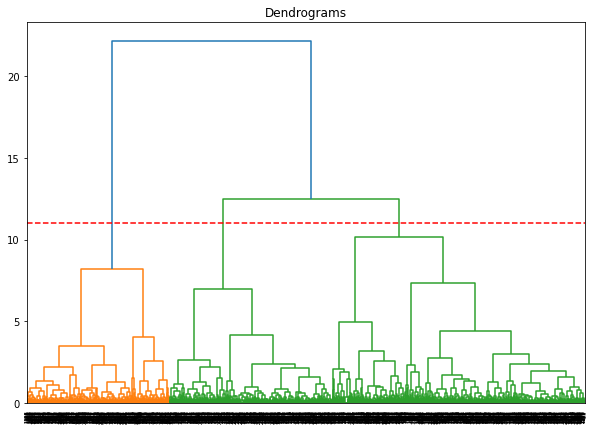

In [7]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=9, color='r', linestyle='--')

In [5]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
label3 = cluster.fit_predict(df)
label3

array([1, 2, 0, ..., 2, 0, 2])

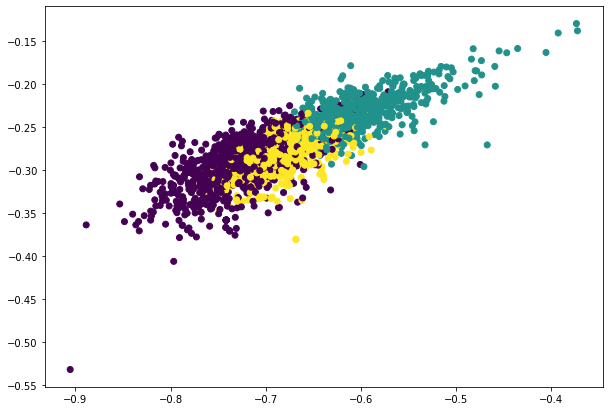

In [10]:
plt.figure(figsize=(10, 7))  
plt.scatter(df[0], df[50], c=cluster.labels_) 

In [223]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
label4 = cluster.fit_predict(df)
label4

array([1, 1, 2, ..., 2, 2, 3])

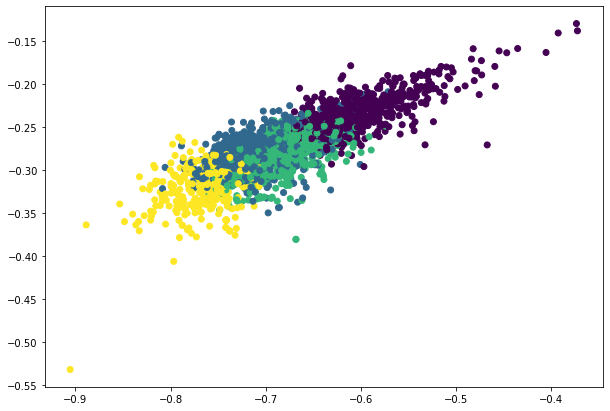

In [15]:
plt.figure(figsize=(10, 7))  
plt.scatter(df[0], df[50], c=cluster.labels_) 

In [6]:
c0=0
c1=0
c2=0
#c3=0
for i in label3:
    if(i==0):
        c0=c0+1
    elif(i==1):
        c1=c1+1
    #elif(i==2):
    #    c2=c2+1
    else:
        c2=c2+1
print(c0)
print(c1)
print(c2)
#print(c3)

816
422
1105


In [7]:
#Cluster-wise separation of regulations' vector values
t=-1
r0 = []
rid0 = []
r1 = []
rid1 = []
r2 = []
rid2 = []
#r3 = []
#rid3 = []
for i in label3:
    t=t+1
    if(i==0):
        r0.append(X0[t])
        rid0.append(t)
    elif(i==1):
        r1.append(X0[t])
        rid1.append(t)
    #elif(i==2):
    #    r2.append(X0[t])
    #    rid2.append(t)
    else:
        r2.append(X0[t])
        rid2.append(t)

In [8]:
#Clusters centroids calculation
#Cluster0
jlist = [0]*100
c=0
s=[]
for i in r0:
    for k in range(0, len(i)): 
        s.append(i[k] + jlist[k]) 
    jlist=s
    s=[]
    #print(len(jlist))
    c=c+1
t=-1
for l in jlist:
    t=t+1
    l=l/c
    jlist[t] = l
cent0 = jlist

In [9]:
#Cluster1
jlist = [0]*100
c=0
s=[]
for i in r1:
    for k in range(0, len(i)): 
        s.append(i[k] + jlist[k]) 
    jlist=s
    s=[]
    #print(len(jlist))
    c=c+1
t=-1
for l in jlist:
    t=t+1
    l=l/c
    jlist[t] = l
cent1 = jlist

In [10]:
#Cluster2
jlist = [0]*100
c=0
s=[]
for i in r2:
    for k in range(0, len(i)): 
        s.append(i[k] + jlist[k]) 
    jlist=s
    s=[]
    #print(len(jlist))
    c=c+1
t=-1
for l in jlist:
    t=t+1
    l=l/c
    jlist[t] = l
cent2 = jlist

In [170]:
'''
#Cluster3
jlist = [0]*100
c=0
s=[]
for i in r3:
    for k in range(0, len(i)): 
        s.append(i[k] + jlist[k]) 
    jlist=s
    s=[]
    #print(len(jlist))
    c=c+1
t=-1
for l in jlist:
    t=t+1
    if(c==0):
        l=l
    else:
        l=l/c
    jlist[t] = l
cent3 = jlist
'''

'\n#Cluster3\njlist = [0]*100\nc=0\ns=[]\nfor i in r3:\n    for k in range(0, len(i)): \n        s.append(i[k] + jlist[k]) \n    jlist=s\n    s=[]\n    #print(len(jlist))\n    c=c+1\nt=-1\nfor l in jlist:\n    t=t+1\n    if(c==0):\n        l=l\n    else:\n        l=l/c\n    jlist[t] = l\ncent3 = jlist\n'

In [11]:
#Cosine similarity within cluster - ascending order

from numpy import dot
from numpy.linalg import norm

def takeThird(elem):
    return elem[2]

In [12]:
#Cluster0
cos0 = []
i=0
while(i<len(r0)-1):
    j=len(r0)-1
    while(j>i):
        cos_sim = dot(r0[i], r0[j])/(norm(r0[i])*norm(r0[j]))
        cos0.append([rid0[i],rid0[j],cos_sim])
        j=j-1
    i=i+1
cos0.sort(key=takeThird)

In [13]:
#Sorting regulations with cosine score
ind0 = []
cs_ind0 = []
counter0 = []
for i in cos0:
    if(i[0] not in ind0):
        ind0.append(i[0])
        counter0.append(1)
        cs_ind0.append(i[2])
    else:
        t=0
        while(t<len(ind0)):
            if(ind0[t] == i[0]):
                cs_ind0[t] = cs_ind0[t]+i[2]
                counter0[t] = counter0[t]+1
                break
            t=t+1
    if(i[1] not in ind0):
        ind0.append(i[1])
        counter0.append(1)
        cs_ind0.append(i[2])
    else:
        t=0
        while(t<len(ind0)):
            if(ind0[t] == i[1]):
                cs_ind0[t] = cs_ind0[t]+i[2]
                counter0[t] = counter0[t]+1
                break
            t=t+1
p=0
while(p<len(cs_ind0)):
    cs_ind0[p] = cs_ind0[p]/counter0[p]
    p=p+1
    
zipped_lists = zip(cs_ind0, ind0)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
cs_ind0, ind0 = [ list(tuple) for tuple in tuples]

In [14]:
#Cluster1
cos1 = []
i=0
while(i<len(r1)-1):
    j=len(r1)-1
    while(j>i):
        cos_sim = dot(r1[i], r1[j])/(norm(r1[i])*norm(r1[j]))
        cos1.append([rid1[i],rid1[j],cos_sim])
        j=j-1
    i=i+1
cos1.sort(key=takeThird)

In [15]:
ind1 = []
cs_ind1 = []
counter1 = []
for i in cos1:
    if(i[0] not in ind1):
        ind1.append(i[0])
        counter1.append(1)
        cs_ind1.append(i[2])
    else:
        t=0
        while(t<len(ind1)):
            if(ind1[t] == i[0]):
                cs_ind1[t] = cs_ind1[t]+i[2]
                counter1[t] = counter1[t]+1
                break
            t=t+1
    if(i[1] not in ind1):
        ind1.append(i[1])
        counter1.append(1)
        cs_ind1.append(i[2])
    else:
        t=0
        while(t<len(ind1)):
            if(ind1[t] == i[1]):
                cs_ind1[t] = cs_ind1[t]+i[2]
                counter1[t] = counter1[t]+1
                break
            t=t+1
p=0
while(p<len(cs_ind1)):
    cs_ind1[p] = cs_ind1[p]/counter1[p]
    p=p+1

zipped_lists = zip(cs_ind1, ind1)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
cs_ind1, ind1 = [ list(tuple) for tuple in tuples]

In [16]:
#Cluster2
cos2 = []
i=0
while(i<len(r2)-1):
    j=len(r2)-1
    while(j>i):
        cos_sim = dot(r2[i], r2[j])/(norm(r2[i])*norm(r2[j]))
        cos2.append([rid2[i],rid2[j],cos_sim])
        j=j-1
    i=i+1
cos2.sort(key=takeThird)

In [17]:
#Sorting regulations with cosine score
ind2 = []
cs_ind2 = []
counter2 = []
for i in cos2:
    if(i[0] not in ind2):
        ind2.append(i[0])
        counter2.append(1)
        cs_ind2.append(i[2])
    else:
        t=0
        while(t<len(ind2)):
            if(ind2[t] == i[0]):
                cs_ind2[t] = cs_ind2[t]+i[2]
                counter2[t] = counter2[t]+1
                break
            t=t+1
    if(i[1] not in ind2):
        ind2.append(i[1])
        counter2.append(1)
        cs_ind2.append(i[2])
    else:
        t=0
        while(t<len(ind2)):
            if(ind2[t] == i[1]):
                cs_ind2[t] = cs_ind2[t]+i[2]
                counter2[t] = counter2[t]+1
                break
            t=t+1
p=0
while(p<len(cs_ind2)):
    cs_ind2[p] = cs_ind2[p]/counter2[p]
    p=p+1
    
zipped_lists = zip(cs_ind2, ind2)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
cs_ind2, ind2 = [ list(tuple) for tuple in tuples]

In [18]:
print(len(ind0))
print(len(ind1))
print(len(ind2))
#print(len(ind3))

816
422
1105


In [19]:
c0 = len(ind0)
c1 = len(ind1)
c2 = len(ind2)

In [20]:
#Resizing clusters

#Cluster0 - size:781
from scipy.spatial import distance
if(c0>781):
    i = c0-781
    p=0
    while(p<i):
        e1= distance.euclidean(cs_ind0[p], cent1)
        e2= distance.euclidean(cs_ind0[p], cent2)
        #e3= distance.euclidean(cs_ind0[p], cent3)
        e = min(e1,e2)
        if(e1 == e):
            cs_ind1.append(cs_ind0[p])
            ind1.append(ind0[p])
        #elif(e2 == e):
        #    cs_ind2.append(cs_ind0[p])
        #    ind2.append(ind0[p])
        #    y=0
        #    for ic in rid0:
        #        if(ic == ind0[p]):
        #            label4[y] = 2
        #            break
        #        y=y+1
        else:
            cs_ind2.append(cs_ind0[p])
            ind2.append(ind0[p])
            
        cs_ind0.remove(cs_ind0[p])
        ind0.remove(ind0[p])
        p=p+1

In [21]:
print(len(ind0))
print(len(ind1))
print(len(ind2))
#print(len(ind3))

781
422
1140


In [22]:
#Cluster1 and 2 - size:781
c2 = len(ind2)
c1 = len(ind1)
if(c2>781):
    i = c2-781
    p=0
    while(p<i):
        cs_ind1.append(cs_ind2[p])
        ind1.append(ind2[p])
        
        cs_ind2.remove(cs_ind2[p])
        ind2.remove(ind2[p])
        p=p+1
else:
    i = c1-781
    p=0
    while(p<i):
        cs_ind2.append(cs_ind1[p])
        ind2.append(ind1[p])
        
        cs_ind1.remove(cs_ind1[p])
        ind1.remove(ind1[p])
        p=p+1

In [24]:
## Cluster sizes - final
print(len(ind0))
print(len(ind1))
print(len(ind2))
#print(len(ind3))

781
781
781


In [23]:
for i in ind0:
    label3[i] = 0
for i in ind1:
    label3[i] = 1
for i in ind2:
    label3[i] = 2

#for i in ind3:
#    label4[i] = 3

In [25]:
kl0=0
kl1=0
kl2=0
#kl3=0

for mass in label3:
    if(mass==0):
        kl0=kl0+1
    elif(mass==1):
        kl1=kl1+1
    #elif(mass==2):
    #    kl2=kl2+1
    else:
        kl2=kl2+1
print(kl0)
print(kl1)
print(kl2)
#print(kl3)

781
781
781


## Clusters Validation

#### silhouette_score

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
silhouette_avg = silhouette_score(X0, label3)
silhouette_avg

0.14597472583901316

In [26]:
#Cluster-wise separation of regulations
t=-1
rid0 = []
rid1 = []
rid2 = []

for i in label3:
    t=t+1
    if(i==0):
        rid0.append(t)
    elif(i==1):
        rid1.append(t)
    else:
        rid2.append(t)

In [27]:
import pandas as pd
ins = pd.read_csv('../data/final_rules.csv')
corpus = ins['text'].tolist()

In [28]:
r0 = []
r1 = []
r2 = []

for i in rid0:
    r0.append(corpus[i])
for i in rid1:
    r1.append(corpus[i])
for i in rid2:
    r2.append(corpus[i])

In [30]:
df0 = pd.DataFrame(r0)
df0.to_csv('reg0-uni.csv', index=False)
df1 = pd.DataFrame(r1)
df1.to_csv('reg1-uni.csv', index=False)
df2 = pd.DataFrame(r2)
df2.to_csv('reg2-uni.csv', index=False)

## Topic Analysis - Clusterwise

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from utils import LemmaTokenizer, combined_plots

/home/deepti-saravanan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
%store -r lol

In [33]:
counter = CountVectorizer(tokenizer=LemmaTokenizer())
subj = pd.DataFrame(
    counter.fit_transform(lol.astype(str)).toarray(),
    columns=counter.get_feature_names()
)

In [34]:
subj['label'] = label3

In [35]:
groups = pd.melt(
    subj.groupby('label').sum().reset_index(),
    id_vars='label', var_name='word', value_name='count'
).groupby('label').apply(lambda group: group.sort_values(by='count', ascending=False)).reset_index(drop=True)

In [36]:
groups.to_csv('hierarchical3_equal.csv',index=False)

In [37]:
pipeline = Pipeline([
    ('counts', CountVectorizer(max_features=100, tokenizer=LemmaTokenizer())),
    ('lda', LatentDirichletAllocation(n_components=3, learning_decay=0.5, max_iter=10, random_state=1))
])

In [38]:
pipeline.fit(lol)

Pipeline(steps=[('counts',
                 CountVectorizer(max_features=100,
                                 tokenizer=<utils.LemmaTokenizer object at 0x7ff658bd4c88>)),
                ('lda',
                 LatentDirichletAllocation(learning_decay=0.5, n_components=3,
                                           random_state=1))])

In [39]:
vectorizer = pipeline.named_steps['counts']
dtm = vectorizer.fit_transform(lol)

In [40]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [41]:
p = pyLDAvis.sklearn.prepare(pipeline.named_steps['lda'], dtm, vectorizer)

In [42]:
pyLDAvis.display(p)

In [43]:
p_df = p.topic_info
l=0
tlist = []
flist = []
while(l<p_df.shape[0]):
    if(p_df.iloc[l]['Category'] != 'Default'):
        tlist.append(p_df.iloc[l]['Term'])
        flist.append(p_df.iloc[l]['Total'])
    l = l+1

#### Tag words for accounting

In [44]:
acc1 = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/accounting/ifrs_iasb.csv', usecols=['Term'])
acc2 = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/accounting/uk_gaap.csv', usecols=['Term'])
acc3 = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/accounting/us_fasb.csv', usecols=['Term'])
acc4 = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/accounting/us_gaap.csv', usecols=['Term'])
acc5 = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/accounting/us_gasb.csv', usecols=['Term'])

In [45]:
acc1 = acc1.append(acc2)
acc1 = acc1.append(acc3)
acc1 = acc1.append(acc4)
acc1 = acc1.append(acc5)
a11 = acc1.values.tolist()

a1 = []
for i in a11:
    a1.append(i[0])
    
g1 = groups.values.tolist()
g = []
for j in g1:
    g.append(j[1])

In [47]:
account = []

for n in a1:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            if(n not in account):
                account.append(n)
        k = k+1

In [48]:
account

['accounting',
 'acquirer',
 'acquisition',
 'agency',
 'audit',
 'bond',
 'broker',
 'capital',
 'cash',
 'chairman',
 'charge',
 'control',
 'cost',
 'coupon',
 'credit',
 'debenture',
 'default',
 'director',
 'dividend',
 'entity',
 'equity',
 'expense',
 'format',
 'group',
 'inventory',
 'management',
 'margin',
 'material',
 'materiality',
 'maturity',
 'memorandum',
 'merger',
 'net',
 'partnership',
 'portfolio',
 'principal',
 'profit',
 'prospectus',
 'provision',
 'recognition',
 'return',
 'revenue',
 'risk',
 'stock',
 'substance',
 'turnover',
 'unlisted',
 'agent',
 'asset',
 'associate',
 'business',
 'derivative',
 'development',
 'income',
 'lease',
 'liability',
 'performance',
 'probable',
 'loss',
 'research',
 'restriction',
 'state',
 'subsidiary',
 'vest',
 'yield']

In [49]:
regtext = pd.read_csv('../code/hierarchical3_equal.csv')
reg = regtext.values.tolist()
label = []
word = []
freq = []
for i in account:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0]
['accounting', 'accounting', 'acquirer', 'acquirer', 'acquirer', 'acquisition', 'acquisition', 'acquisition', 'agency', 'agency', 'agency', 'audit', 'audit', 'audit', 'bond', 'bond', 'bond', 'broker', 'broker', 'capital', 'capital', 'capital', 'cash', 'cash', 'chairman', 'chairman', 'charge', 'charge', 'charge', 'control', 'control', 'control', 'cost', 'cost', 'cost', 'coupon', 'credit', 'credit', 'credit', 'debenture', 'debenture', 'debenture', 'default', 'default', 'director', 'director', 'director', 'dividend', 'dividend', 'entity', 'entity', 'entit

In [50]:
df = pd.DataFrame(list(zip(label, word, freq)), columns =['Cluster', 'word', 'freq'])
df.to_csv('uni-acc.csv',index=False)

#### Percentage accounting tag words clusterwise

In [46]:
#Word counts clusterwise
k=0
c0 = 0
c1 = 0
c2 = 0
#c3 = 0

while(k<len(reg)):
    r = reg[k]
    if(r[0] == 0):
        c0 = c0 + r[2]
    elif(r[0] == 1):
        c1 = c1 + r[2]
    #elif(r[0] == 2):
    #    c2 = c2 + r[2]
    else:
        c2 = c2 + r[2]
    k=k+1
print(c0)
print(c1)
print(c2)
#print(c3)

6526
5112
5601


In [72]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/f_0
s1 = sum1/f_1
s2 = sum2/f_2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

34.454168585905116
33.728144388042864
30.182648401826484


#### Relative to global frequency

In [73]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

28.62227142097465
31.75429998549521
39.34425550174884


#### Tag words for finance

In [51]:
fin = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/financial/financial.csv', usecols=['term'])

In [52]:
f1 = fin.values.tolist()
f = []
for i in f1:
    f.append(i[0])

In [53]:
finance = []

for n in f:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            if(n not in finance):
                finance.append(n)
        k = k+1

In [54]:
for i in finance:
    if(i in account):
        print(i)

asset
broker
business
debenture
dividend
equity
income
maturity
portfolio
principal
prospectus
turnover
yield
default


In [55]:
label = []
word = []
freq = []
for i in finance:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 2, 0]
['account', 'account', 'account', 'asset', 'asset', 'asset', 'basis', 'basis', 'basis', 'broker', 'broker', 'business', 'business', 'business', 'buy', 'buy', 'buy', 'commission', 'commission', 'commission', 'debenture', 'debenture', 'debenture', 'dividend', 'dividend', 'equity', 'equity', 'equity', 'exchange', 'exchange', 'exchange', 'income', 'holding', 'holding', 'holding', 'information', 'information', 'information', 'institution', 'institution', 'institution', 'investment', 'investment', 'investment', 'issuer', 'issuer', 'issuer', 'lot', 'maturity', 'option', 'option', 'option', 'portfolio', 'portfolio', 'portfolio', 'price', 'price', 'price', 'principal', 'principal', 'prospectus', 'prospectus', 'prospectus', 'quantity', 'right', 'righ

In [56]:
df = pd.DataFrame(list(zip(label, word, freq)), columns =['Cluster', 'word', 'freq'])
df.to_csv('uni-fin.csv',index=False)

In [79]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/f_0
s1 = sum1/f_1
s2 = sum2/f_2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

23.445416858590512
23.688663282571913
23.470319634703195


In [80]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

31.156694036547677
30.57103911881208
37.56736867229809


#### Tag words for Banking

In [57]:
bank = pd.read_csv('/home/deepti-saravanan/Desktop/laws/semantics/code/banking.csv')

In [58]:
b1 = bank.values.tolist()
b2 = []
for i in b1:
    b2.append(i[0])

In [59]:
banking = []

for n in b2:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            if(n not in banking):
                banking.append(n)
        k = k+1

In [60]:
banking

['affidavit',
 'alteration',
 'application',
 'bank',
 'bankruptcy',
 'bond',
 'deposit',
 'collateral',
 'debit',
 'draft',
 'escrow',
 'fiduciary',
 'hold',
 'insurance',
 'lease',
 'lender',
 'lien',
 'maturity',
 'payment',
 'refund',
 'renewal',
 'statement',
 'transfer']

In [61]:
label = []
word = []
freq = []
for i in banking:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]
['affidavit', 'affidavit', 'alteration', 'application', 'application', 'application', 'bank', 'bank', 'bank', 'bankruptcy', 'bankruptcy', 'bond', 'bond', 'bond', 'deposit', 'deposit', 'deposit', 'collateral', 'collateral', 'debit', 'draft', 'draft', 'draft', 'escrow', 'escrow', 'escrow', 'fiduciary', 'fiduciary', 'hold', 'hold', 'hold', 'insurance', 'lease', 'lender', 'lien', 'maturity', 'payment', 'payment', 'payment', 'refund', 'refund', 'renewal', 'renewal', 'renewal', 'statement', 'statement', 'statement', 'transfer', 'transfer', 'transfer']
[1, 1, 1, 27, 42, 67, 14, 3, 15, 2, 1, 3, 4, 1, 2, 1, 2, 1, 1, 1, 12, 6, 15, 4, 1, 4, 1, 1, 7, 15, 11, 5, 4, 1, 2, 1, 11, 3, 9, 4, 5, 2, 3, 2, 11, 5, 24, 10, 3, 7]


In [62]:
df = pd.DataFrame(list(zip(label, word, freq)), columns =['Cluster', 'word', 'freq'])
df.to_csv('uni-bank.csv',index=False)

In [86]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/f_0
s1 = sum1/f_1
s2 = sum2/f_2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

5.711653615845233
4.906937394247039
7.671232876712329


In [87]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

20.24657755149971
31.494676191221764
50.2415072574252


#### Tag words for Capital Market

In [63]:
cap = pd.read_csv('/home/deepti-saravanan/Desktop/laws/semantics/CapMarket.csv')

In [64]:
capm1 = cap.values.tolist()
c = []
for i in capm1:
    c.append(i[0])

In [65]:
cap_market = []

for n in c:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            if(n not in cap_market):
                cap_market.append(n)
        k = k+1

In [66]:
cap_market

['acquirer',
 'adviser',
 'analyst',
 'intermediary',
 'arbitration',
 'securities',
 'bond',
 'auditor',
 'authorized',
 'authority',
 'basis',
 'broker',
 'brokerage',
 'market',
 'clearing',
 'coupon',
 'cover',
 'custodian',
 'delivery',
 'dematerialise',
 'depository',
 'derivative',
 'disclosure',
 'distribution',
 'dividend',
 'equity',
 'ex',
 'exchange',
 'hypothecation',
 'director',
 'insider',
 'trading',
 'investment',
 'issuer',
 'liquidation',
 'company',
 'listed',
 'list',
 'listing',
 'security',
 'key',
 'manager',
 'managerial',
 'margin',
 'maturity',
 'merger',
 'option',
 'plan',
 'person',
 'portfolio',
 'price',
 'sensitive',
 'information',
 'prospectus',
 'proxy',
 'split',
 'stakeholder',
 'transferor',
 'trustee',
 'underlying',
 'underwriter',
 'underwriting',
 'value',
 'vesting',
 'warrant',
 'stock',
 'settlement',
 'invest',
 'promoter']

In [67]:
label = []
word = []
freq = []
for i in cap_market:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2]
['acquirer', 'acquirer', 'acquirer', 'adviser', 'adviser', 'adviser', 'analyst', 'analyst', 'analyst', 'intermediary', 'intermediary', 'intermediary', 'arbitration', 'arbitration', 'securities', 'securities', 'bond', 'bond', 'bond', 'auditor', 'auditor', 'auditor', 'authorized', 'authority', 'authority', 'authority', 'basis', 'basis', 'basis', 'broker', 'broker', 'brokerage', 'market', 'market', 'market', 'clearing', 'clearing', 'clearing', 'coupon', 'cover', 'cover', 'custodian', 'custodian', 'cust

In [68]:
df = pd.DataFrame(list(zip(label, word, freq)), columns =['Cluster', 'word', 'freq'])
df.to_csv('uni-cap.csv',index=False)

In [93]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/f_0
s1 = sum1/f_1
s2 = sum2/f_2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

59.23537540304007
69.7123519458545
61.00456621004567


In [94]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

32.07175661971771
33.30442666359185
34.32568523481214


#### Tag words for Commodity Market

In [69]:
comm = pd.read_csv('/home/deepti-saravanan/Desktop/laws/semantics/CommMarket.csv')

In [70]:
cm1 = comm.values.tolist()
cm = []
for i in cm1:
    cm.append(i[0])

In [71]:
comm_market = []

for n in cm:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            #print("word is: ")
            #print(g[k])
            if(n not in comm_market):
                comm_market.append(n)
        k = k+1

In [72]:
comm_market

['basis',
 'close',
 'cover',
 'delivery',
 'contract',
 'limit',
 'liquidation',
 'long',
 'margin',
 'offer',
 'position',
 'short',
 'purchase',
 'sale',
 'merchant']

In [73]:
label = []
word = []
freq = []
for i in comm_market:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 1, 2, 2, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 2]
['basis', 'basis', 'basis', 'close', 'cover', 'cover', 'delivery', 'contract', 'contract', 'contract', 'limit', 'limit', 'limit', 'liquidation', 'long', 'margin', 'offer', 'offer', 'offer', 'position', 'position', 'position', 'short', 'purchase', 'purchase', 'sale', 'sale', 'merchant', 'merchant', 'merchant']
[1, 3, 2, 2, 3, 1, 1, 12, 1, 7, 4, 1, 4, 1, 2, 1, 46, 61, 89, 2, 1, 2, 3, 7, 3, 5, 4, 6, 3, 16]


In [74]:
df = pd.DataFrame(list(zip(label, word, freq)), columns =['Cluster', 'word', 'freq'])
df.to_csv('uni-comm.csv',index=False)

In [100]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/f_0
s1 = sum1/f_1
s2 = sum2/f_2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

4.2837402118839245
4.004512126339538
5.93607305936073


In [101]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

23.487387635296276
31.146318385936368
45.44298912046453


#### Tag words for Pension Funds

In [75]:
pen = pd.read_csv('/home/deepti-saravanan/Desktop/laws/semantics/Pension.csv')

In [76]:
p1 = pen.values.tolist()
p = []
for i in p1:
    p.append(i[0])

In [77]:
pension = []

for n in p:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            if(n not in pension):
                pension.append(n)
        k = k+1

In [78]:
pension

['administrator', 'benefit', 'asset', 'retirement', 'member', 'pension']

In [79]:
label = []
word = []
freq = []
for i in pension:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0]
['administrator', 'administrator', 'benefit', 'benefit', 'benefit', 'asset', 'asset', 'asset', 'retirement', 'member', 'member', 'member', 'pension']
[23, 5, 6, 2, 5, 25, 8, 8, 2, 23, 15, 4, 3]


In [80]:
df = pd.DataFrame(list(zip(label, word, freq)), columns =['Cluster', 'word', 'freq'])
df.to_csv('uni-pf.csv',index=False)

In [107]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/f_0
s1 = sum1/f_1
s2 = sum2/f_2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

3.6849378166743434
1.410039481105471
1.095890410958904


In [108]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

53.5355903982059
34.91451547709081
9.310537460557548


Cluster 2 combo

In [62]:
c2list = []
for i in account:
    c2list.append(i)
for i in finance:
    if(i not in c2list):
        c2list.append(i)
for i in cap_market:
    if(i not in c2list):
        c2list.append(i)
for i in pension:
    if(i not in c2list):
        c2list.append(i)
for i in comm_market:
    if(i not in c2list):
        c2list.append(i)
for i in banking:
    if(i not in c2list):
        c2list.append(i)

In [65]:
label = []
word = []
freq = []
for i in c2list:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 

In [67]:
f_0 = 0
f_1 = 0
f_2 = 0
t=-1
for i in label:
    t=t+1
    if(i==0):
        f_0 = f_0 + freq[t]
    elif(i==1):
        f_1 = f_1 + freq[t]
    else:
        f_2 = f_2 + freq[t]

In [85]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/c0
s1 = sum1/c1
s2 = sum2/c2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

30.554704259883543
34.135367762128325
31.297982503124445


In [86]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

36.907815002175255
31.68619188881402
30.983747957755845
